In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Iris dataset and KNN

[0 1 2]


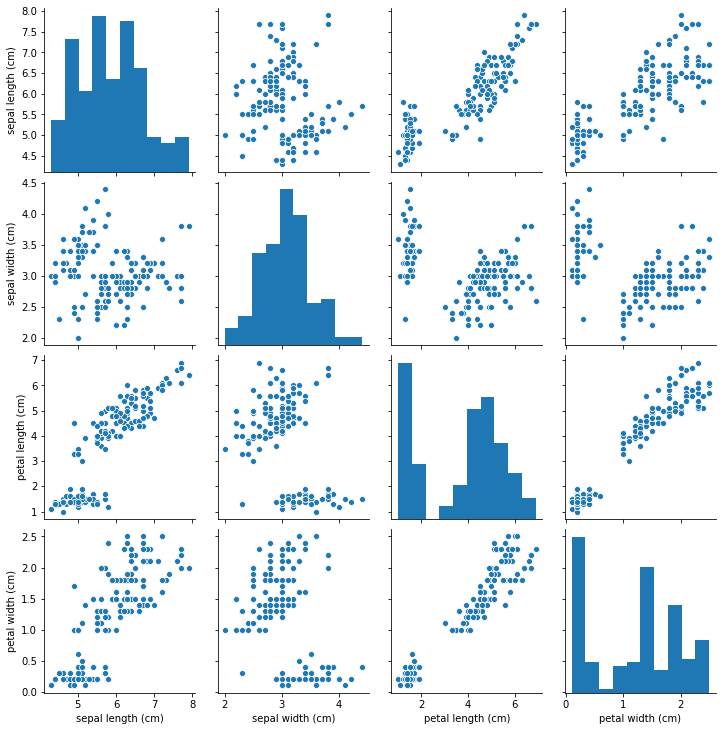

In [223]:
iris = datasets.load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris['feature_names'])
Y_iris = pd.Series(iris.target, name='target')
print(Y_iris.unique())
sns.pairplot(X_iris)

In [224]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_iris, Y_iris, test_size=0.3)
knn = neighbors.KNeighborsClassifier(6)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [225]:
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.9777777777777777

# Random dataset and Logistic Regression

In [86]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=100)
    plt.show()

### 2 features and 2 classes:

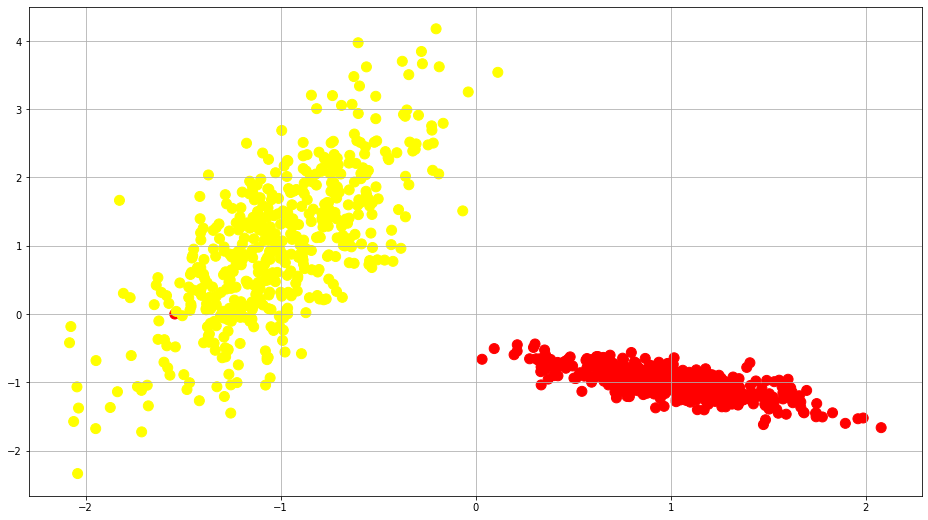

In [212]:
random_dataset = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, 
                                              n_redundant=0, n_clusters_per_class=1, random_state=7)
plot_dataset(random_dataset)

## Logistic Regression

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X, y = random_dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.3)
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

1.0

In [214]:
a = pipe.get_params()['logreg'].intercept_
b, c = pipe.get_params()['logreg'].coef_[0]

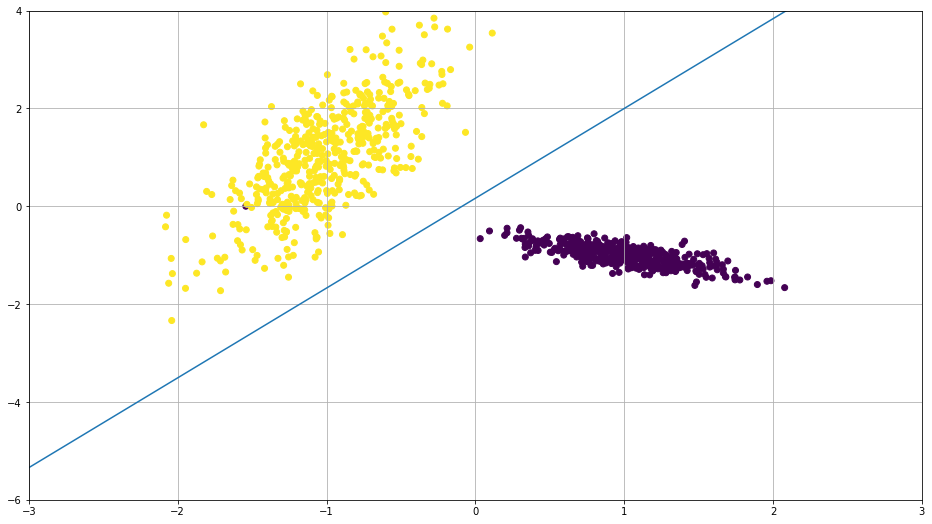

In [215]:
plt.figure(figsize=(16, 9))
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-4, 4, 200)
yy = -a / c - xx * b / c
plt.plot(xx, yy)
plt.ylim((-6, 4))
plt.xlim((-3, 3))
plt.grid()
plt.show()

## SVM

In [220]:
from sklearn.svm import LinearSVC

pipeSVC = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC(C=1e-1))])

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.3)

pipeSVC.fit(X_train, Y_train)
pipeSVC.score(X_test, Y_test)


0.9966666666666667

In [221]:
a = pipeSVC.get_params()['svc'].intercept_
b, c = pipeSVC.get_params()['svc'].coef_[0]

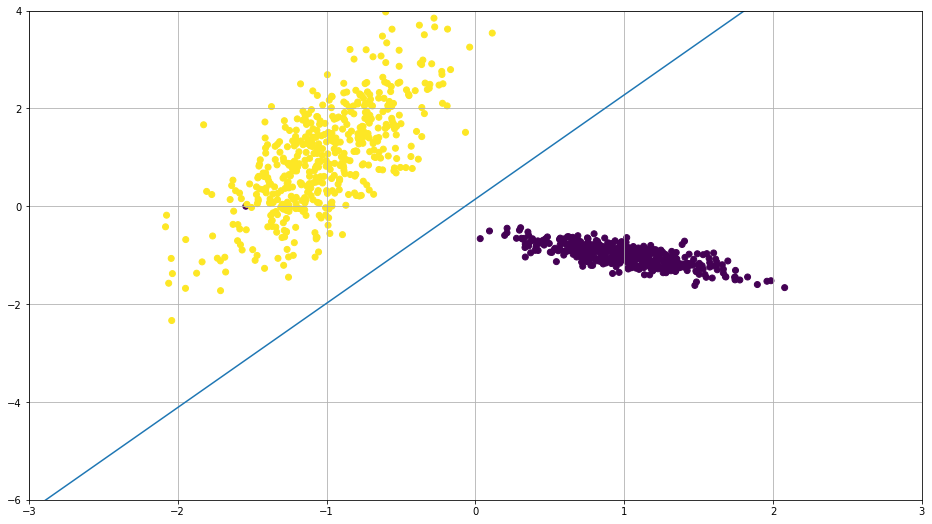

In [222]:
plt.figure(figsize=(16, 9))
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-4, 4, 200)
yy = -a / c - xx * b / c
plt.plot(xx, yy)
plt.ylim((-6, 4))
plt.xlim((-3, 3))
plt.grid()
plt.show()

# Iris dataset and LogisticRegression, SVM

In [245]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_iris, Y_iris, test_size=0.3)
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.9777777777777777

In [246]:
pipeSVC.fit(X_train, Y_train)
pipeSVC.score(X_test, Y_test)

0.9111111111111111

# Custom LogRegression with arctg-sigmoid